In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [28]:
# Carrega o dataset
gastos_diretos = pd.read_csv('../databases/gastosdiretos.csv', encoding='utf-8')

In [29]:
# Define as variáveis 
X = gastos_diretos[['ORÇAMENTO INICIAL (R$)']].values
y = gastos_diretos['ORÇAMENTO REALIZADO (R$)'].values

In [30]:
# Conjuntos de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Padroniza a variável X para ter média 0 e desvio padrão 1.
scaler = StandardScaler()

# Calcula a média e o desvio padrão da variável de entrada no treinamento e aplica a padronização.
X_train = scaler.fit_transform(X_train)

# Aplica a padronização no conjunto de teste usando as estatísticas do conjunto de treinamento
X_test = scaler.transform(X_test)

In [31]:
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)

y_pred = lin_regr.predict(X_test)

print(f'Coeficiente: {lin_regr.coef_[0]:.2f}')
print(f'Intercepto: {lin_regr.intercept_:.2f}')
print(f'Erro quadrático médio: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R²: {r2_score(y_test, y_pred):.2f}')

Coeficiente: 174509340662.79
Intercepto: 6023463664.19
Erro quadrático médio: 210136419992161247821824.00
R²: 0.27


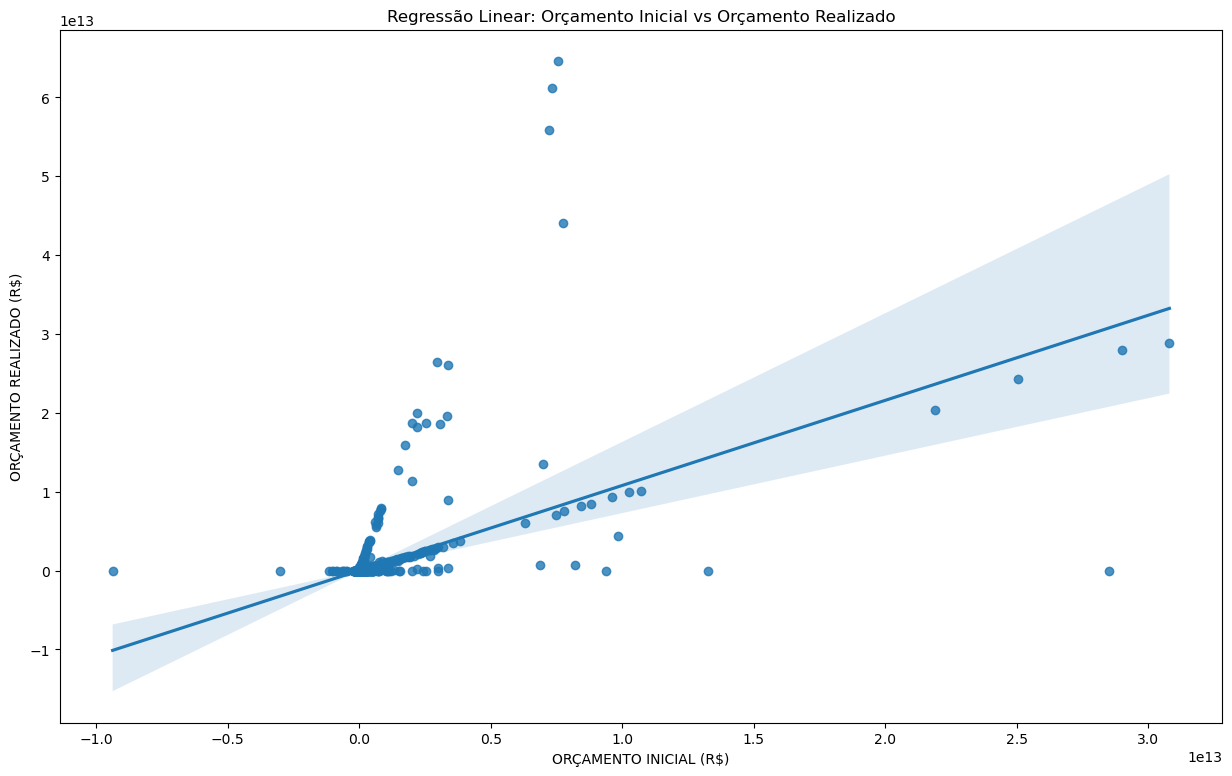

In [32]:
plt.figure(figsize=(15.0, 9.0))
sns.regplot(x='ORÇAMENTO INICIAL (R$)', y='ORÇAMENTO REALIZADO (R$)', data=gastos_diretos)
plt.title('Regressão Linear: Orçamento Inicial vs Orçamento Realizado')
plt.savefig('../resultados/regressao.png', bbox_inches='tight')
plt.show()